## Concrete Strength Prediction

Dipak Mani

## Problem Statement
How strong will be the concrete mixture? Can you estimate it while creating it? A seasoned 
civil engineer will know the winning mixture by heart! He/she will understand what should 
be the right amount water, ash, cement etc. should be mixed in order to create a high strength 
concrete mixture.

Our task is to create a machine learning model which can predict the future strength of a 
concrete, based on its components and the time for which it is dried.

# Data Description
The business meaning of each column in the data is as below
* Cement: How much cement is mixed
* BlastFurnaceSlag : How much Blast Furnace Slag is mixed
* FlyAshComponent : How much FlyAsh is mixed
* Water : How much water is mixed
* Superplasticizer: How much Super plasticizer is mixed
* CourseAggregate : How much Course Aggregate is mixed
* FineAggregate : How much Fine Aggregate is mixed
* AgeInDays : How many days it was left dry
* Strength : What was the final strength of concrete

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

### Reading the dataset

In [2]:
data = pd.read_csv('concrete_data.csv', encoding='latin')

In [3]:
# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
data.head(5)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### Observation

* It shows that there are eight independent variables ( cement, slag, ash, water, superplastic, coarseagg, fineagg, age) and one dependent variable (strength).
* All the records are numeric.

In [4]:
#renaming columns
data = data.rename(columns={'cement':"CementComponent",
       'blast_furnace_slag':"BlastFurnaceSlag",
       'fly_ash':"FlyAshComponent",
       'water':"Water",
       'fine_aggregate ':"Fineagg",
       'superplasticizer':"Superplastic",
       'coarse_aggregate':"Coarse_Aggregate",
       'age':"AgeInDays",
       'concrete_compressive_strength':"Strength"})

In [5]:
#Info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CementComponent   1030 non-null   float64
 1   BlastFurnaceSlag  1030 non-null   float64
 2   FlyAshComponent   1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplastic      1030 non-null   float64
 5   Coarse_Aggregate  1030 non-null   float64
 6   Fineagg           1030 non-null   float64
 7   AgeInDays         1030 non-null   int64  
 8   Strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


It gives the details about the number of rows (1030), number of columns (9), data types information i.e. except age which is integer type all other columns are float type. Memory usage is 72.5 KB. Also,there are no null values in the data.

In [6]:
print('Shape before deleting duplicates:',data.shape)

# Remove duplicate rows if any
data = data.drop_duplicates()
print('Shape After deleting duplicate values:',data.shape)

Shape before deleting duplicates: (1030, 9)
Shape After deleting duplicate values: (1005, 9)


## Defining the problem statement
Create a ML model which can predict the Strength of concrete
* Target Variable : Strength
* Predictors : water, cement, ash, days to dry etc.

## Features 
* <b>Cement</b> - it is the major factor that influences the strength and durability of concrete.


* <b>Furance Slag</b> - it is the supplementary material that enhances the strength and durability of concrete and improves its
resistance to chemical attack.


* <b>Fly Ash</b> - it's a byproduct of coal combustion, used to reduce the carbon footprint.


* <b>Water</b> - It is essential to initiate the chemical reaction between cement and other components, but it's excessive and
inadequate amount can adeversely affect the strength and durability of concrete.


* <b>Superplasticizer</b> - Superplasticizer are chemical additives that can significantly improve the strength and workability of
concrete by reducing its water-cement ratio without compromising its fluidity.


* <b>Course Aggregate</b> - Course aggregates in concrete provide mechanical strength, increases the durability, and reduces the
cost by reducing the cement content and aslo enhancing its resistance to compressive and tensile forces.


* <b>Final Aggregate</b> - Fine aggregate in concrete fills the voids between course aggregate partcles and helps to produce
workable mix, resulting in a smoother surface finish and improved strength.


* <b>Age</b> - Age is an important factor in  determining the strength of concrete as its affects the chemical reaction between cement and
water, resulting in gradual strength gain over time.

## Basic Data Exploration
There are four commands which are used for Basic data exploration in Python
* head() : This helps to see a few sample rows of the data
* info() : This provides the summarized information of the data
* describe() : This provides the descriptive statistical details of the data
* nunique() : This helps us to identify if a column is categorical or continuous

In [7]:
data.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,Water,Superplastic,Coarse_Aggregate,Fineagg,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CementComponent   1005 non-null   float64
 1   BlastFurnaceSlag  1005 non-null   float64
 2   FlyAshComponent   1005 non-null   float64
 3   Water             1005 non-null   float64
 4   Superplastic      1005 non-null   float64
 5   Coarse_Aggregate  1005 non-null   float64
 6   Fineagg           1005 non-null   float64
 7   AgeInDays         1005 non-null   int64  
 8   Strength          1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [9]:
# Data type of the columns 
data.dtypes

CementComponent     float64
BlastFurnaceSlag    float64
FlyAshComponent     float64
Water               float64
Superplastic        float64
Coarse_Aggregate    float64
Fineagg             float64
AgeInDays             int64
Strength            float64
dtype: object

In [10]:
#To get the columns name
data.columns

Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent', 'Water',
       'Superplastic', 'Coarse_Aggregate', 'Fineagg', 'AgeInDays', 'Strength'],
      dtype='object')

In [11]:
# Looking at the descriptive statistics of the data.
data.describe(include='all')

,CementComponent,BlastFurnaceSlag,FlyAshComponent,Water,Superplastic,Coarse_Aggregate,Fineagg,AgeInDays,Strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [12]:
data.nunique()

CementComponent     278
BlastFurnaceSlag    185
FlyAshComponent     156
Water               195
Superplastic        111
Coarse_Aggregate    284
Fineagg             302
AgeInDays            14
Strength            845
dtype: int64

## Let's look at the distribution of Target variable

* If target variable's distribution is too skewed then predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine.
* When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Maching Learning algorithms ability to learn all the scenarios.

<AxesSubplot:>

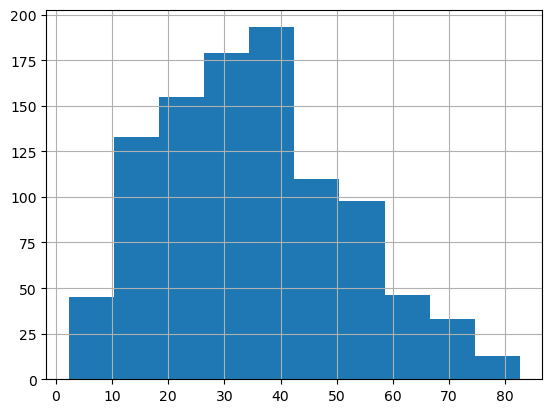

In [13]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous.
data['Strength'].hist()

* The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each
type of values to learn them.

## Exploratory Data Analysis (EDA)

### Box Plots

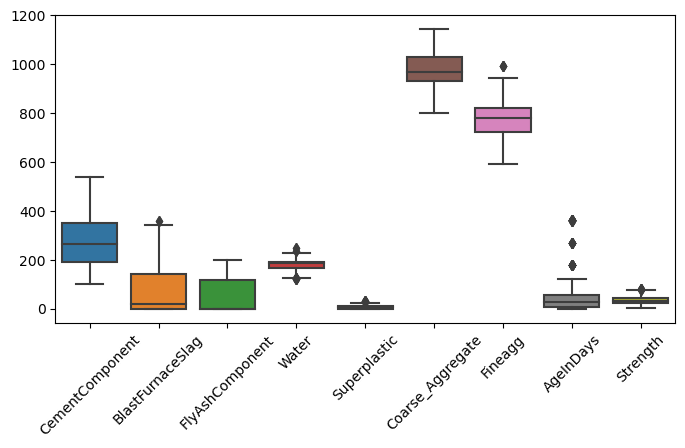

In [14]:
plt.subplots(figsize=(8, 4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

## Observations

* Age column appears to be having maximum number of outliers
* Slag, Water, superplastic, fineagg features have some outliers
* All features except age and strength have same units(kg in m3 mixture) but have different scales. Thus we might need to scale the data so as to avoid bias in algorithms

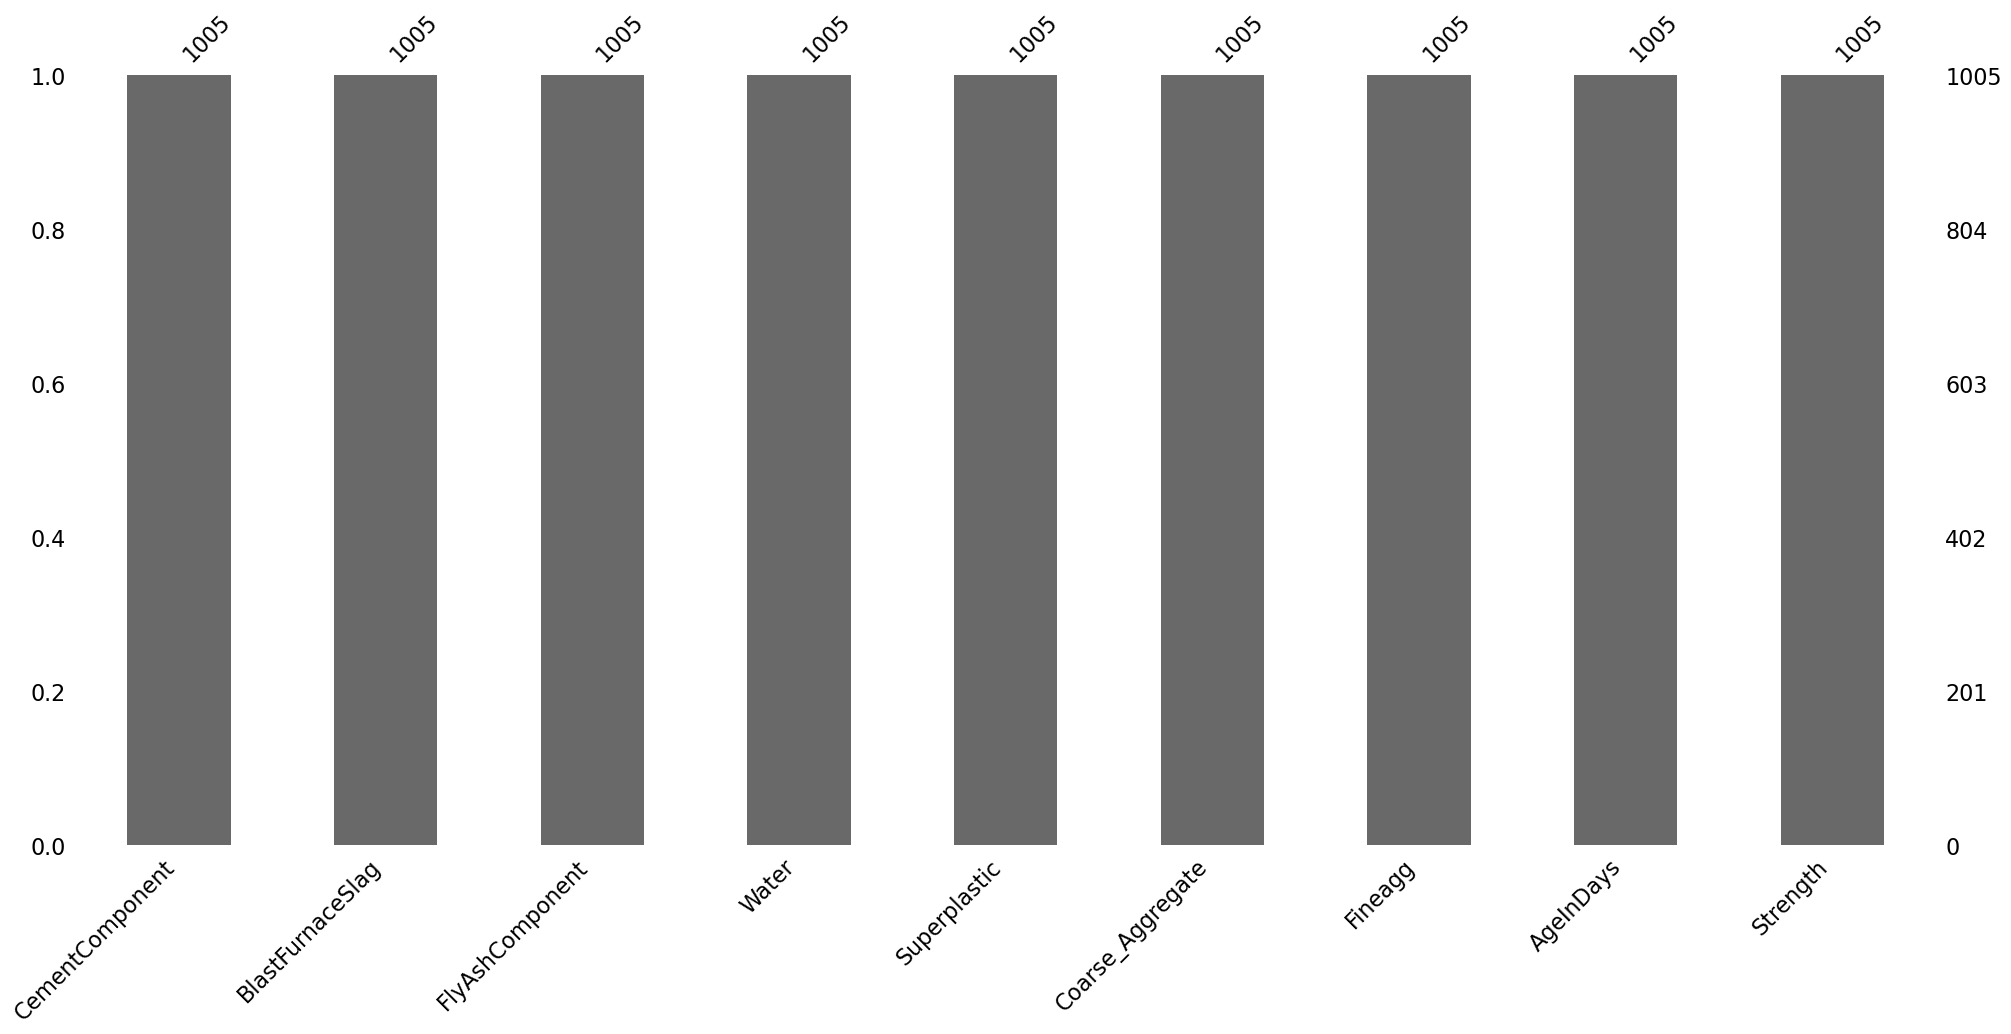

In [15]:
# visualizing missing values

msno.bar(data)
plt.show()

In [16]:
data.columns

Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent', 'Water',
       'Superplastic', 'Coarse_Aggregate', 'Fineagg', 'AgeInDays', 'Strength'],
      dtype='object')

* Categorical variables:Bar plot
* Continuous variables:Histogram

array([[<AxesSubplot:title={'center':'CementComponent'}>,
        <AxesSubplot:title={'center':'BlastFurnaceSlag'}>,
        <AxesSubplot:title={'center':'FlyAshComponent'}>],
       [<AxesSubplot:title={'center':'Water'}>,
        <AxesSubplot:title={'center':'Superplastic'}>,
        <AxesSubplot:title={'center':'Coarse_Aggregate'}>],
       [<AxesSubplot:title={'center':'Fineagg'}>,
        <AxesSubplot:title={'center':'AgeInDays'}>,
        <AxesSubplot:title={'center':'Strength'}>]], dtype=object)

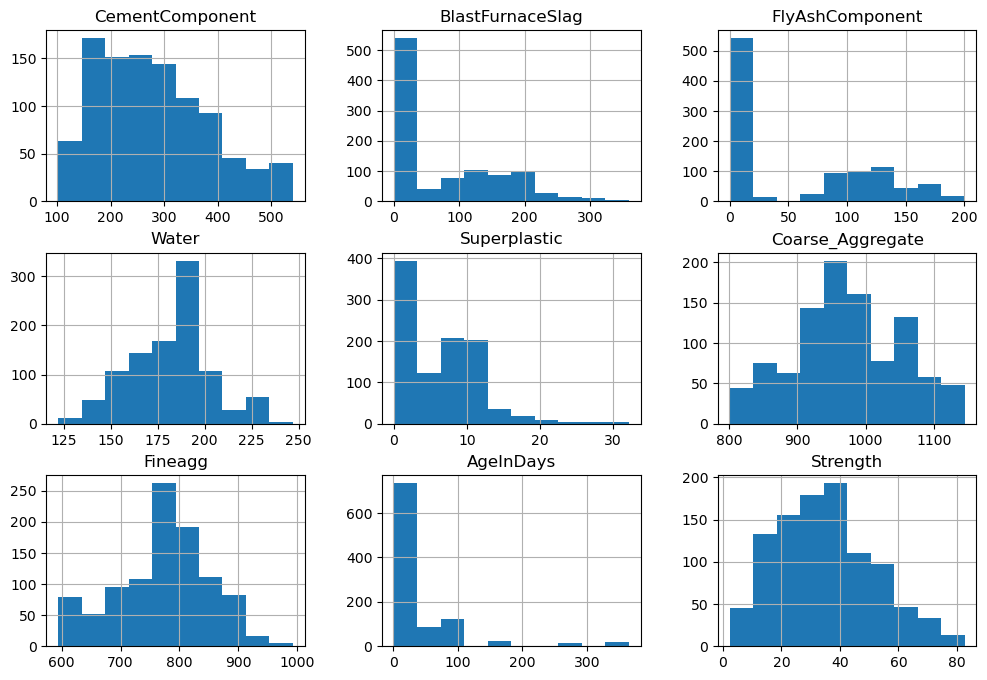

In [17]:
# Plotting histograms of multiple columns together
data.hist(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent', 'Water',
       'Superplastic', 'Coarse_Aggregate', 'Fineagg', 'AgeInDays', 'Strength'],figsize=(12,8))

Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range.
For example, in the above histogram of "AgeInDays", there are around 800 rows in data that has a value
between 0 to 25.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. if there is too much
skewness, then outlier treatment should be done and the column should be re-examined, if that also
does not solve the problem then only reject the column.

## Missing Values Treatment
Missing values treated for each column separately.
If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected
because to much information is missing.

There are below options for treating missing values in data.

* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Interpolate the values based on business logic

In [18]:
data.isnull().sum()

CementComponent     0
BlastFurnaceSlag    0
FlyAshComponent     0
Water               0
Superplastic        0
Coarse_Aggregate    0
Fineagg             0
AgeInDays           0
Strength            0
dtype: int64

## Outliers Treatment

There are below two options to treat outliers in the data.

* Method-1:Delete the outlier Records. Only if there are just few rows lost.
* Method-2:Impute the outlier values with a logical business value 

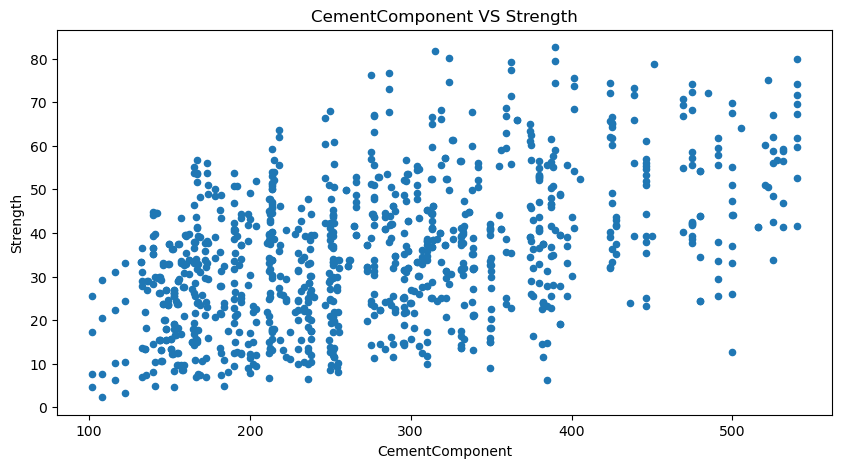

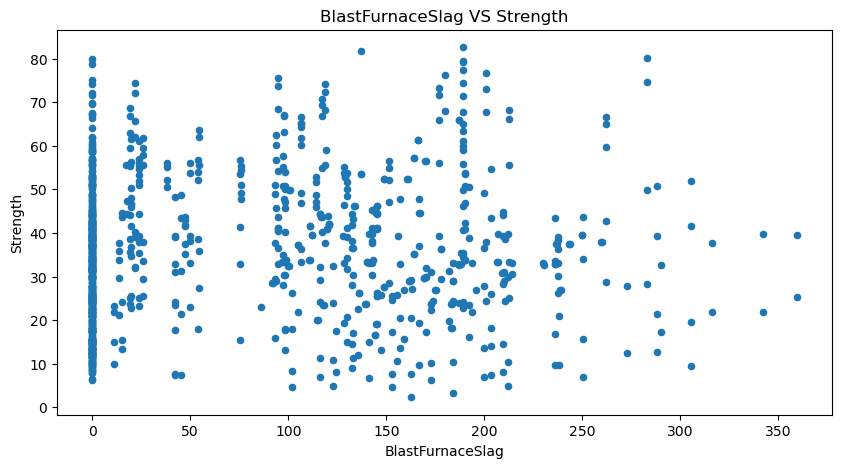

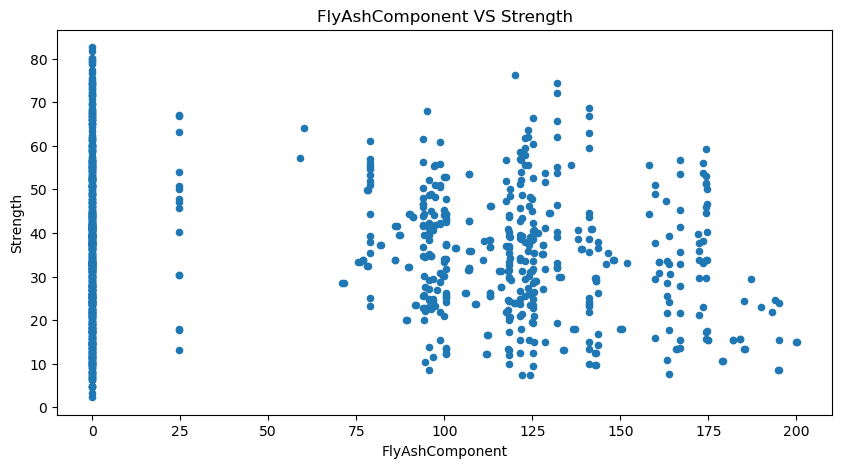

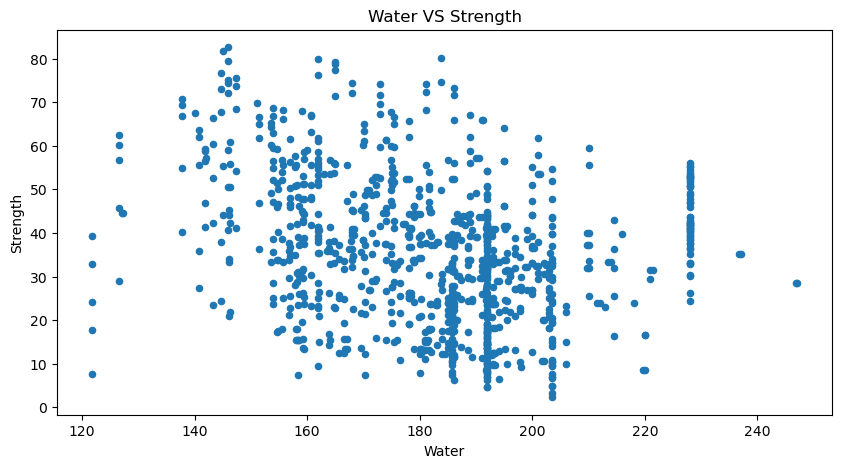

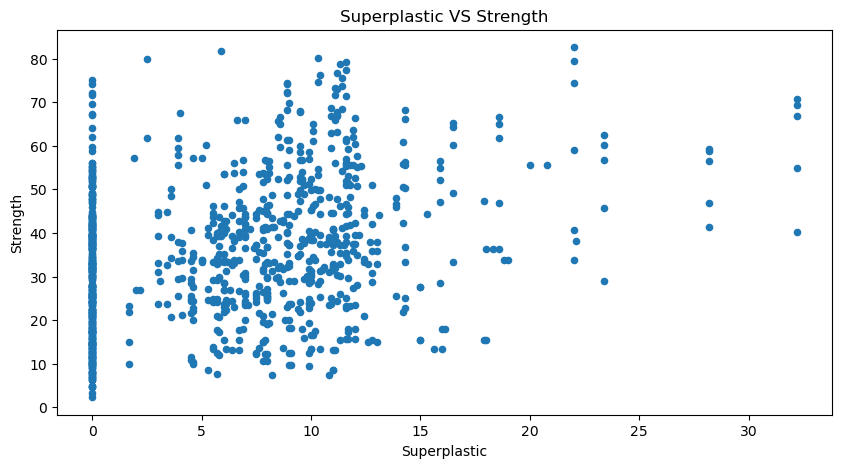

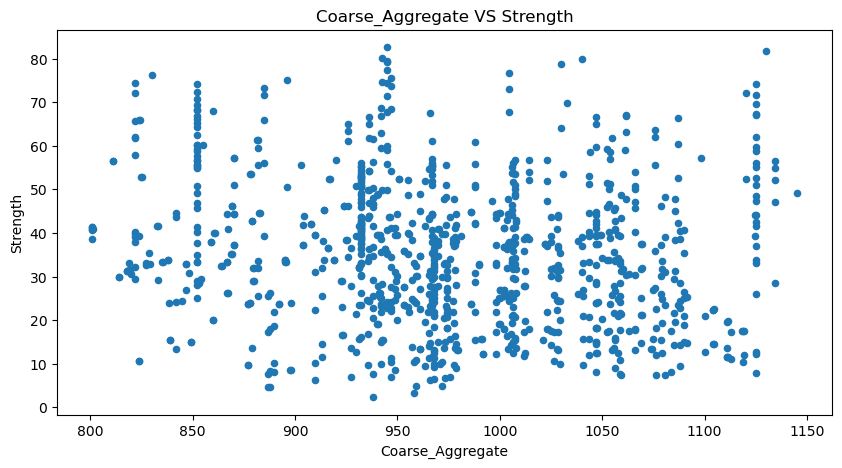

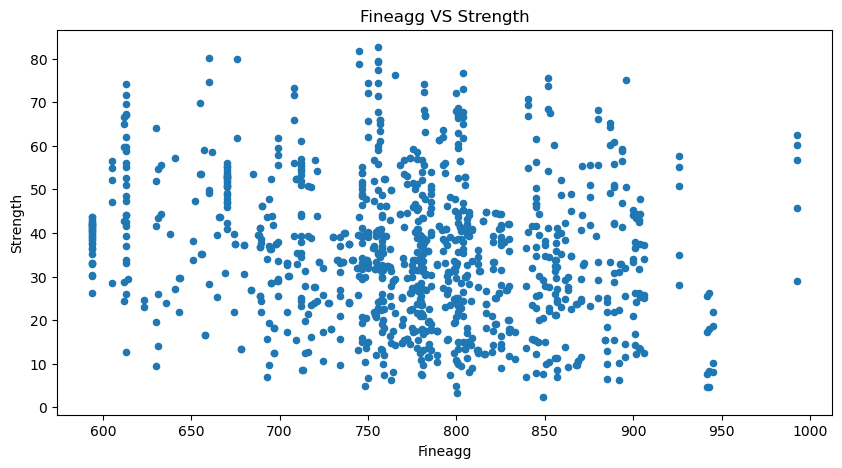

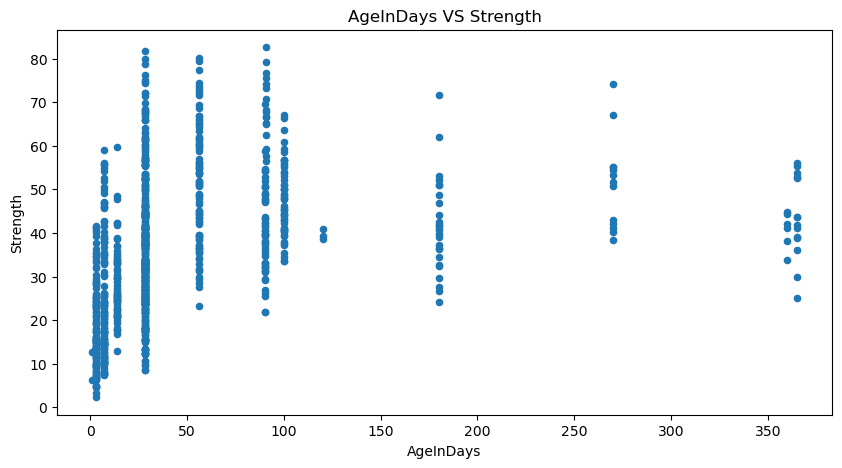

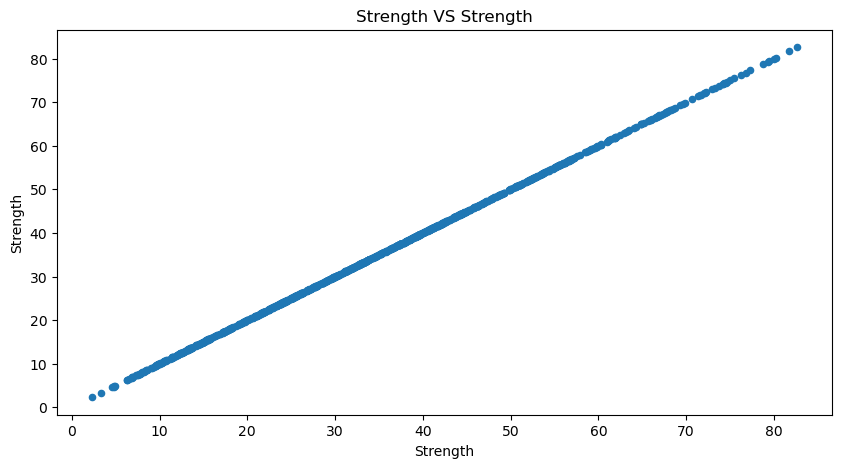

In [19]:
ContinuousCols = ['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent', 'Water',
       'Superplastic', 'Coarse_Aggregate', 'Fineagg', 'AgeInDays', 'Strength']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    data.plot.scatter(x=predictor, y='Strength',figsize=(10,5), title=predictor+" VS "+'Strength')

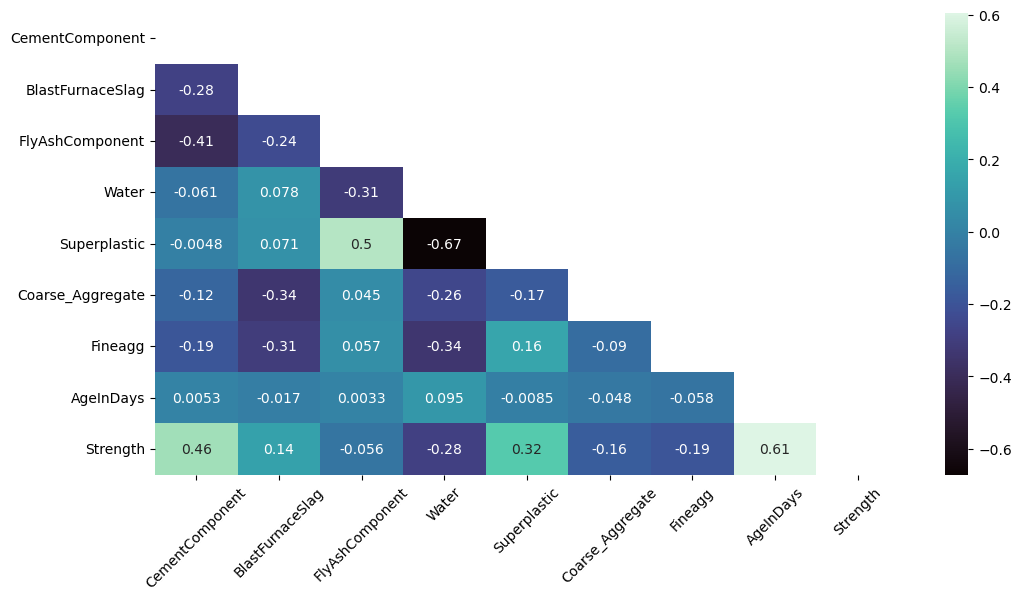

In [20]:
plt.subplots(figsize=(12, 6))
corr = data.corr('spearman')

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(data=corr, cmap='mako', annot=True, mask=mask)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

## Observations

* As expected, cement and age have strong correlation with strength
* Super plastic has mild positive correlation with strength
* As expected, water and superplastic have strong correlation

In [21]:
# Calculating correlation matrix
ContinuousCols = ['Strength','CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent', 'Water',
       'Superplastic', 'Coarse_Aggregate', 'Fineagg', 'AgeInDays']

# Creating the correlation matrix
CorrelationData = data[ContinuousCols].corr()
CorrelationData

,Strength,CementComponent,BlastFurnaceSlag,FlyAshComponent,Water,Superplastic,Coarse_Aggregate,Fineagg,AgeInDays
Strength,1.000000,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367
CementComponent,0.488283,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348
BlastFurnaceSlag,0.103374,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759
FlyAshComponent,-0.080648,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940
Water,-0.269624,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284
Superplastic,0.344209,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076
Coarse_Aggregate,-0.144717,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264
Fineagg,-0.186448,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572
AgeInDays,0.337367,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000


In [22]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# Reduce the 0.5 threshold if no varaiable is selected
CorrelationData['Strength'][abs(CorrelationData['Strength'])> 0.3 ]

Strength           1.000000
CementComponent    0.488283
Superplastic       0.344209
AgeInDays          0.337367
Name: Strength, dtype: float64

In [23]:
SelectedColumns=['CementComponent','Superplastic','AgeInDays']

# Selecting final columns
DataForML = data[SelectedColumns]
DataForML.head()

,CementComponent,Superplastic,AgeInDays
0,540.0,2.5,28
1,540.0,2.5,28
2,332.5,0.0,270
3,332.5,0.0,365
4,198.6,0.0,360


In [24]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric = pd.get_dummies(DataForML)

# Adding Target Variable to data
DataForML_Numeric['Strength']=data['Strength']

# Printing sample rows
DataForML_Numeric.head()

,CementComponent,Superplastic,AgeInDays,Strength
0,540.0,2.5,28,79.99
1,540.0,2.5,28,61.89
2,332.5,0.0,270,40.27
3,332.5,0.0,365,41.05
4,198.6,0.0,360,44.30


## Modelling

## Splitting the data into Training and Testing sample

In [25]:
# Separate Target Variable and Predictor Variables
TargetVariable='Strength'
Predictors=['CementComponent','Superplastic','AgeInDays']

X = DataForML_Numeric[Predictors].values
y = DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)

## Standardization/Normalization of data
You can choose not to run this step if you want to compare the result accuracy of this tranformation with the accuracy of
raw data

However, if you are using KNN or Neural Networks, then this steps becomes neccessary.

In [26]:
# Check for sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(703, 3)
(703,)
(302, 3)
(302,)


## Random Forest Model

In [27]:
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=5, n_estimators=100)

In [28]:
# Creating the model on Training data
RF = RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

In [29]:
from sklearn import metrics
# Measuring goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

R2 Value: 0.7956870665906991


<AxesSubplot:>

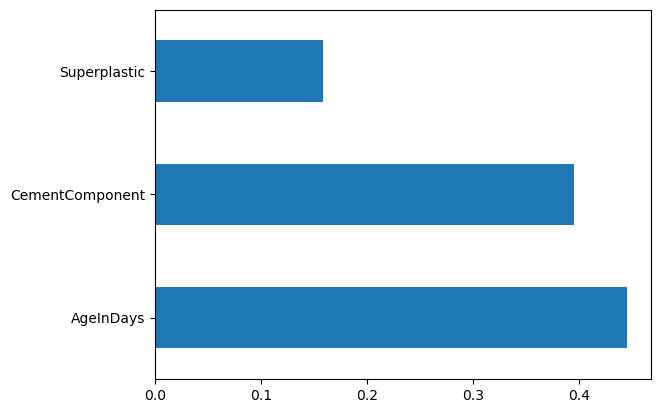

In [30]:
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [31]:
print('\n#### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())


#### Model Validation and Accuracy Calculations ##########
   Strength  PredictedStrength
0     47.13               42.0
1     18.20               26.0
2     24.48               32.0
3     19.69               32.0
4     61.24               43.0


In [32]:
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
 TestingDataResults['Strength']-TestingDataResults['PredictedStrength']))/TestingDataResults['Strength'])
MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])

Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean Accuracy on test data:',Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:',MedianAccuracy)

# Define custom function to calculate Accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig,pred)/orig))
    #print('#'*70,'Accuracy:',100-MAPE)
    return (100-MAPE)

Mean Accuracy on test data: 77.16850241467236
Median Accuracy on test data: 84.52471283618276


In [33]:
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

In [34]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross Validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test 
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuarcy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Final Average Accuarcy of the model: 0.0


## AdaBoost

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [36]:
DTR = DecisionTreeRegressor(max_depth=10)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR, learning_rate=0.04)

In [37]:
# Creating the model on Training data
AB = RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

In [38]:
from sklearn import metrics
# Measuring goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

R2 Value: 0.969157365758084


<AxesSubplot:>

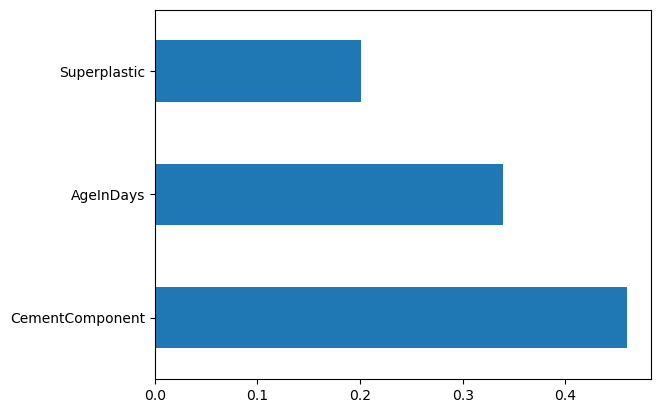

In [39]:
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [40]:
data.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,Water,Superplastic,Coarse_Aggregate,Fineagg,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [41]:
#Splitting the data into independent and dependent attributes


#independent and dependent variables
X = data.drop('Strength', axis = 1)
y = data['Strength']

In [42]:
from scipy.stats import zscore

Xscaled = X.apply(zscore)
Xscaled_data = pd.DataFrame(Xscaled, columns=data.columns)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, test_size= 0.3, random_state= 1)

## Building different Models

## Random Forest

In [44]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [45]:
y_pred = model.predict(X_test)

In [46]:
#Model Performance on Training Data

model.score(X_train, y_train)

# round(model.score(X_train, y_train)*100) #if you want to get the exact percentage, uncomment this one

0.9841016638955593

In [47]:
#Model Performance on Test Data

model.score(X_test, y_test)

# round(model.score(X_test, y_test)*100) #if you want to get the exact percentage, uncomment this one

0.9025661264436103

In [48]:
#Same as above
acc_R=metrics.r2_score(y_test, y_pred)
acc_R

0.9025661264436103

In [49]:
metrics.mean_squared_error(y_test, y_pred)

26.231429202798278

In [50]:
#Store the accuracy results for each model in a dataframe for final comparison

results_1 = pd.DataFrame({'Algorithm': ['Random Forest'], 'accuracy': acc_R},index={'1'})
results = results_1[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.902566


In [51]:
from sklearn.ensemble import GradientBoostingRegressor

## Gradient Boosting Regressor

In [52]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [53]:
y_pred = model.predict(X_test)

In [54]:
#Model Performance on Training Data

model.score(X_train, y_train)

0.9489751204753397

In [55]:
#Model Performance on Test Data

model.score(X_test, y_test)

0.8979077227788318

In [56]:
#Same as above, you can also store the above in a variable and use without doing the following.
acc_G=metrics.r2_score(y_test, y_pred)
acc_G

0.8979077227788318

In [57]:
#Store the accuracy results for each model in a dataframe for final comparison

gradient_re = pd.DataFrame({'Algorithm': ['Gradient Boost Regressor'], 'accuracy': acc_G},index={'3'})
results = pd.concat([results, gradient_re])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.902566
3,Gradient Boost Regressor,0.897908


## Ada Boost Regressor

In [58]:
from sklearn.ensemble import AdaBoostRegressor

In [59]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor()

In [60]:
y_pred = model.predict(X_test)

In [61]:
#Model Performance on Test Data, NB: check on train data

model.score(X_test, y_test)

0.763472981529445

In [62]:
#Same as above, you can also store the above in a variable and use without doing the following.
acc_Ada=metrics.r2_score(y_test, y_pred)
acc_Ada

0.763472981529445

In [63]:
#Store the accuracy results for each model in a dataframe for final comparison

acc_Ada = pd.DataFrame({'Algorithm': ['Ada Boost Regressor'], 'accuracy': acc_Ada},index={'5'})
results = pd.concat([results, acc_Ada])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.902566
3,Gradient Boost Regressor,0.897908
5,Ada Boost Regressor,0.763473


## Support Vector Regressor

In [64]:
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [65]:
y_pred = model.predict(X_test)

In [66]:
model.score(X_train, y_train)

0.601270335544895

In [67]:
acc_SVR=metrics.r2_score(y_test, y_pred)
acc_SVR

0.5310047071630244

In [68]:
metrics.mean_squared_error(y_test, y_pred)

126.26426900064448

In [69]:
#Store the accuracy results for each model in a dataframe for final comparison

SVR_df = pd.DataFrame({'Algorithm': ['Support Vector Regressor'], 'accuracy': acc_SVR},index={'11'})
results = pd.concat([results, SVR_df])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.902566
3,Gradient Boost Regressor,0.897908
5,Ada Boost Regressor,0.763473
11,Support Vector Regressor,0.531005


## XGBoost Regressor

In [70]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgr = XGBRegressor()

xgr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [71]:
y_pred = xgr.predict(X_test)

In [72]:
xgr.score(X_train, y_train)

0.9978221673462693

In [73]:
acc_XGB=metrics.r2_score(y_test, y_pred)
acc_XGB

0.912281863033429

In [74]:
metrics.mean_squared_error(y_test, y_pred)

23.615730501654397

In [75]:
#Store the accuracy results for each model in a dataframe for final comparison

XGB_df = pd.DataFrame({'Algorithm': ['XGBoost Regressor'], 'accuracy': [acc_XGB]},index={'13'})
results = pd.concat([results, XGB_df])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.902566
3,Gradient Boost Regressor,0.897908
5,Ada Boost Regressor,0.763473
11,Support Vector Regressor,0.531005
13,XGBoost Regressor,0.912282


## DesionTreeRegressor

In [76]:
from sklearn.tree import DecisionTreeRegressor

dec_model = DecisionTreeRegressor()
dec_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [77]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)
print('Feature importance: \n',pd.DataFrame(dec_model.feature_importances_,columns=['Importance'],index=X_train.columns))

Feature importance: 
                   Importance
CementComponent     0.373798
BlastFurnaceSlag    0.089608
FlyAshComponent     0.006313
Water               0.122690
Superplastic        0.041393
Coarse_Aggregate    0.027691
Fineagg             0.022807
AgeInDays           0.315701


In [78]:
y_pred = dec_model.predict(X_test)

In [79]:
dec_model.score(X_train, y_train)

0.9987004752237358

In [80]:
dec_model.score(X_test, y_test)

0.8160689475752133

In [81]:
acc_DT=metrics.r2_score(y_test, y_pred)
acc_DT

0.8160689475752133

In [82]:
#Store the accuracy results for each model in a dataframe for final comparison

DT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor 1'], 'accuracy': [acc_DT]},index={'14'})
results = pd.concat([results, DT_df])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.902566
3,Gradient Boost Regressor,0.897908
5,Ada Boost Regressor,0.763473
11,Support Vector Regressor,0.531005
13,XGBoost Regressor,0.912282
14,Decision Tree Regressor 1,0.816069
